<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [1]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [2]:
# How can we quickly look at some descriptive statistics of the above dataframe?
df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 180.0 # mean
sigma = 5.0 # standard deviation

sample1 = np.random.normal(mu, sigma, 1000)

In [0]:
mu2 = 178.5 # mean
sigma2 = 4.25 # standard deviation

sample2 = np.random.normal(mu2, sigma2, 1000)

In [39]:
# Verify the mean of our sample
print(np.mean(sample1))
abs(mu - np.mean(sample1)) < 0.1

180.0005623370359


True

In [40]:
# Verify the variance of our sample
print(np.std(sample1, ddof=1))
abs(sigma - np.std(sample1, ddof=1)) < 0.1

4.9325994077491995


True

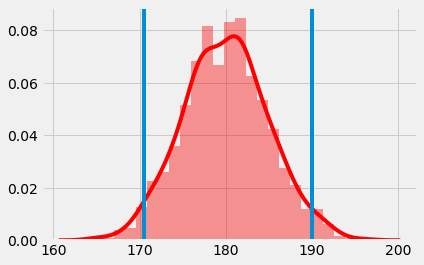

In [41]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample1, color='r')
ax.axvline(np.percentile(sample1,97.5),0)
ax.axvline(np.percentile(sample1,2.5),0);

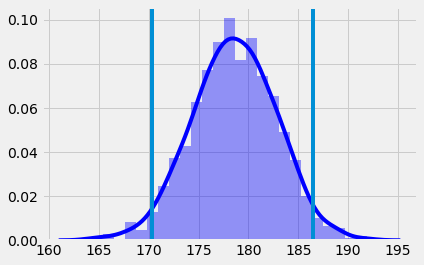

In [74]:
ax = sns.distplot(sample2, color='b')
ax.axvline(np.percentile(sample2,97.5),0)
ax.axvline(np.percentile(sample2,2.5),0);

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

When we talk about the **population parameters**: we use $\mu$ and $\sigma$ for mean and standard deviation

When we talk about the **sample statistics**: we use $\bar{x}$ and s

# Our first 2-sample t-test (pancake example)

1) Null Hypothesis: (boring hypothesis)

  $\bar{x}_1$ == $\bar{x}_2$

  ($\mu_{1} == \mu_{2}$) would be for the population parameter

  or that the average cooking time between the two burners is the same.

2) Alternate Hypothesis (usually the opposite)

  $\bar{x}_1 \neq \bar{x}_2$

  Or that the average cooking time between the two burners is different.

3) Confidence Level: The probability of seing a true result in spite of random variability.  (How often do I want to make sure that I'm right.)  Typically: **95%**, 99%, or 99.9%

In [75]:
# Run a T test
from scipy.stats import ttest_ind

ttest_ind(sample1, sample2)

Ttest_indResult(statistic=6.923883050473092, pvalue=5.900898876310215e-12)

4) T Statistic: A value that falls along a t-distribution
  - A vertical bar that falls on our t-distribution

5) P-value: The p-value that we're interested in is (1-Confidence Level) or in our case: .05
- The probability of getting this test result (t-statistic) due to random change.
- The probability of our null hypothesis being true.

6) Conclusions

Due to observing a t-statistic of 6.9 and a resulting p-value of 5.9e-12 (or .0000000000059), we reject the null hypothesis that the cooking times of these two burners is the same, and suggest the alternative hypothesis, that they are different.

# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

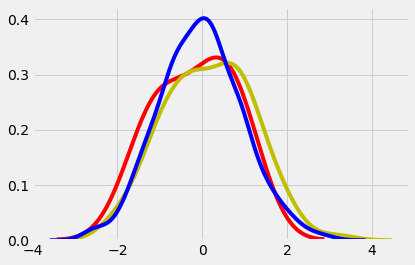

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.31273998586964813
Standard Deviation: 1.1501190874764438
Variance: 1.3227739153776474
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.08090662415049571
Standard Deviation: 1.0383358313816349
Variance: 1.0781412987309908
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.026011887125489363
Standard Deviation: 0.9716065366464899
Variance: 0.9440192620541868


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [44]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-01-17 22:38:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2020-01-17 22:38:05 (463 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [49]:
# Create the dataframe
col_headers = ['party', 'handicapped-infants', 'water-project', 'budget', 
               'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
               'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 
               'immigration', 'synfuels', 'education', 'right-to-sue', 'crime', 
               'duty-free', 'south-africa']
df = pd.read_csv('house-votes-84.data', header=None, 
                 names=col_headers, na_values='?')
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [50]:
df = df.replace({'y': 1, 'n': 0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [51]:
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [52]:
rep = df[df['party'] == 'republican']
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [53]:
dem = df[df['party'] == 'democrat']
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [62]:
# The percentage of republicans who voted yes on the handicapped-infants bill
print(rep['handicapped-infants'].sum()/len(rep))

# Remove NaN values
no_nans = rep[~np.isnan(rep['handicapped-infants'])]
no_nans['handicapped-infants'].sum()/len(no_nans)

0.18452380952380953


0.18787878787878787

In [55]:
# len() includes the NaN values (or people who didn't vote at all), mean() does not
rep['handicapped-infants'].mean()

0.18787878787878787

In [66]:
# Alternate:
rep['handicapped-infants'].sum()/(len(rep) - rep['handicapped-infants'].isnull().sum())

0.18787878787878787

## Lets look at the water project bill

1) Null Hypothesis: There is no difference between voting rates for the water project between Democrats and Republicans in the House of Representatives.

2) Alternate Hypothesis: Democrats and Republicans had different levels of support for the water project

3) Confidence Level: 95%

In [67]:
ttest_ind(dem['water-project'], rep['water-project'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [70]:
# Remove the NaN's
dem_votes = dem[~np.isnan(dem['water-project'])]['water-project']
rep_votes = rep[~np.isnan(rep['water-project'])]['water-project']

ttest_ind(dem_votes, rep_votes)

Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823994811)

In [71]:
print(dem_votes.mean())
print(rep_votes.mean())

0.502092050209205
0.5067567567567568


In [72]:
# Or just use the library right
ttest_ind(dem['water-project'], rep['water-project'], nan_policy='omit')

Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

In [76]:
print(len(dem_votes))
print(len(rep_votes))

239
148


When I have multiple samples (using a 2-sample t-test) I will use the smaller of the two samples to determine my degrees of freedom.

So in this case, df = 148-1 = 147

4) T-statistic: .089

5) P-value: .929

I want to **reject** the null hypothesis if my p-value is < .05 (or if my p-value is less than the 1-confidence level)

Conclusion: due to a p-value of .929 I **fail to reject** the null hypothesis that republican and democrat support for the water-project bill is different.

## 1-sample T-test example:

We're looking at Democrat support of the South-Africa bill

1a) Null Hypothesis: there was full Democrat support of the South-Africa bill

  $\bar{x}_{1}$ (average dem support for SA bill) == 1

1b) Null Hypothesis: there was split Democrat support of the South-Africa bill

  $\bar{x}_{1}$ (average dem support for SA bill) == .5

1c) Null Hypothesis: there was no Democrat support of the South-Africa bill

  $\bar{x}_{1}$ (average dem support for SA bill) == 0

**With 1-sample t-tests I can frame what I'm asking through my choice of null hypothesis**

1) Null Hypothesis: there was mixed Democrat support of the South-Africa bill

  $\bar{x}_{1}$ (average dem support for SA bill) == .5

2) Alternate Hypothesis: the party is not split on support of the South-Africa bill

 $\bar{x}_{1}$ (average dem support for SA bill) $\neq$ .5

3) Confidence Level: 95%

In [77]:
# Run the test
from scipy.stats import ttest_1samp
ttest_1samp(dem['south-africa'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=23.965755112488182, pvalue=1.7513759267849718e-58)

In [78]:
dem['south-africa'].mean()

0.9351351351351351

Due to a p-value of 1.7e-58, we reject the null hyposthesis that democrat support for the South Africa bill is split (50%), and conclude it is something different.

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means